In [1]:
import tempun
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

plt.rcParams["font.family"] = "sans-serif"
plt.rcParams['font.size'] = 8

let's load the GIST dataset

In [2]:
try:
    GIST = gpd.read_parquet("../../GI_ETL/data/large_data/GIST_v0-2.parquet")
except:
    GIST = gpd.read_parquet("https://zenodo.org/record/7185509/files/GIST_v0-2.parquet?download=1")

let's load the shipwrecks dataset...

In [3]:
# the file loaded below was first downloaded manually from: http://oxrep.classics.ox.ac.uk/databases/shipwrecks_database/ 
shipwrecks = pd.read_csv("../data/oxrep_shipwrecksdatabase20230725.csv", encoding="latin-1")
shipwrecks.head(100)

,country,site_area,sitename,locname,localt,locheight,recs,post_0,ante_0,fs_provenance,fs_destination,fs_amph,fs_ma,fs_col,fs_blck,fs_sarc
0,Albany,Adriatic,Butrint,Butrint 1,-30.0,10.0,1,-300.0,-275.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN
1,Albany,Adriatic,Butrint,Butrint 2,0.0,0.0,1,50.0,200.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN
2,Albany,Adriatic,Butrint,Butrint 3,0.0,0.0,1,-600.0,-400.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN
3,Albany,Adriatic,Cape Qefalit,Cape Qefalit,NaN,NaN,1,-520.0,-480.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN
4,Albany,Adriatic,Porto Palermo,Porto Palermo,0.0,0.0,1,400.0,500.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Croatia,Adriatic,Silba,Silba C,NaN,NaN,1,-150.0,400.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
96,Croatia,Adriatic,Silba,Silba D,NaN,NaN,1,1000.0,1500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
97,Croatia,Adriatic,Skolj od Volam,Skolj od Volam,-41.0,3.0,1,1.0,100.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN
98,Croatia,Adriatic,Skoljic,Skoljic,NaN,NaN,1,50.0,150.0,Northern Italy,NaN,104.0,NaN,NaN,NaN,NaN


In [4]:
shipwrecks.shape

(1784, 16)

In [5]:
shipwrecks.columns

Index(['country', 'site_area', 'sitename', 'locname', 'localt', 'locheight',
       'recs', 'post_0', 'ante_0', 'fs_provenance', 'fs_destination',
       'fs_amph', 'fs_ma', 'fs_col', 'fs_blck', 'fs_sarc'],
      dtype='object')

In [6]:
shipwrecks["index_id"] = shipwrecks.index

In [7]:
shipwrecks["random_dates"] = shipwrecks.apply(lambda row: tempun.model_date(row["post_0"], row["ante_0"], size=100, seed=row["index_id"]), axis=1)

In [8]:
shipwrecks.head(10)

,country,site_area,sitename,locname,localt,locheight,recs,post_0,ante_0,fs_provenance,fs_destination,fs_amph,fs_ma,fs_col,fs_blck,fs_sarc,index_id,random_dates
0,Albany,Adriatic,Butrint,Butrint 1,-30.0,10.0,1,-300.0,-275.0,NaN,NaN,41.0,NaN,NaN,NaN,NaN,0,"[-286, -282, -285, -286, -289, -284, -289, -27..."
1,Albany,Adriatic,Butrint,Butrint 2,0.0,0.0,1,50.0,200.0,NaN,NaN,19.0,NaN,NaN,NaN,NaN,1,"[113, 158, 50, 95, 72, 64, 78, 102, 110, 131, ..."
2,Albany,Adriatic,Butrint,Butrint 3,0.0,0.0,1,-600.0,-400.0,NaN,NaN,30.0,NaN,NaN,NaN,NaN,2,"[-513, -595, -490, -513, -516, -534, -559, -47..."
3,Albany,Adriatic,Cape Qefalit,Cape Qefalit,NaN,NaN,1,-520.0,-480.0,NaN,NaN,9.0,NaN,NaN,NaN,NaN,3,"[-498, -492, -508, -500, -484, -484, -515, -51..."
4,Albany,Adriatic,Porto Palermo,Porto Palermo,0.0,0.0,1,400.0,500.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,4,"[497, 455, 497, 471, 470, 422, 498, 401, 425, ..."
5,Albany,Adriatic,Qefalit,Qefalit Tile wreck,0.0,0.0,1,-400.0,-300.0,Corinth,NaN,2.0,NaN,NaN,NaN,NaN,5,"[-378, -313, -379, -308, -351, -339, -323, -34..."
6,Albany,Adriatic,Rodon,Rodon,0.0,0.0,1,-525.0,-475.0,Corinth,NaN,1.0,NaN,NaN,NaN,NaN,6,"[-480, -508, -484, -523, -520, -495, -499, -50..."
7,Albany,Adriatic,Saranda,Saranda 1,-78.0,0.0,1,-600.0,-450.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,7,"[-589, -483, -534, -491, -453, -519, -525, -58..."
8,Albany,Adriatic,Saranda,Saranda 2,0.0,0.0,1,-400.0,-300.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,8,"[-313, -303, -313, -347, -377, -399, -357, -36..."
9,Albany,Adriatic,Saranda,Saranda 3,0.0,0.0,1,1.0,200.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,9,"[3, 101, 100, 28, 29, 44, 84, 50, 18, 70, 34, ..."


(-850.0, 850.0)

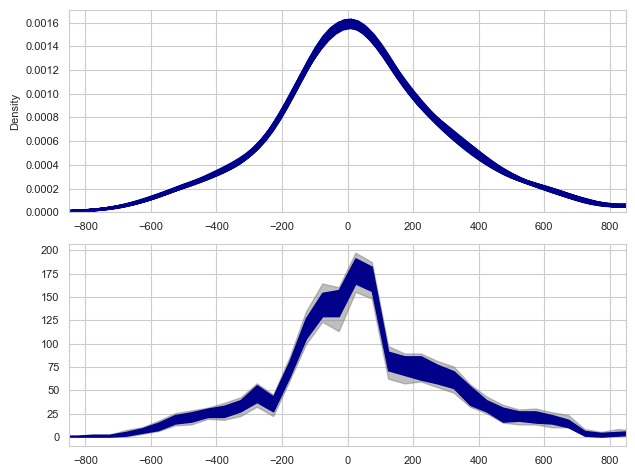

In [9]:
fig, [ax1, ax2] = plt.subplots(2,1, tight_layout=True)
tempun.kdeplot_from_randoms(shipwrecks["random_dates"], random_size=100, color="darkblue", ax=ax1)
ax1.set_xlim(-850,850)
tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], random_size=100, color="darkblue", ax=ax2)
ax2.set_xlim(-850,850)

# Durations...

In [11]:
def get_duration(start, stop):
    try:
        duration = abs(int(start) - int(stop)) + 1
        if 0 in range(int(start),  int(stop)):
            duration = duration - 1
    except:
        duration = np.nan
    return duration

GIST["duration"] = GIST.apply(lambda row: get_duration(row["not_before"], row["not_after"]), axis=1)
shipwrecks["duration"] = shipwrecks.apply(lambda row: get_duration(row["post_0"], row["ante_0"]), axis=1)

In [12]:
get_duration(101, 149)

49

Text(0.5, 1.0, '(B) GIST  (N=217863)')

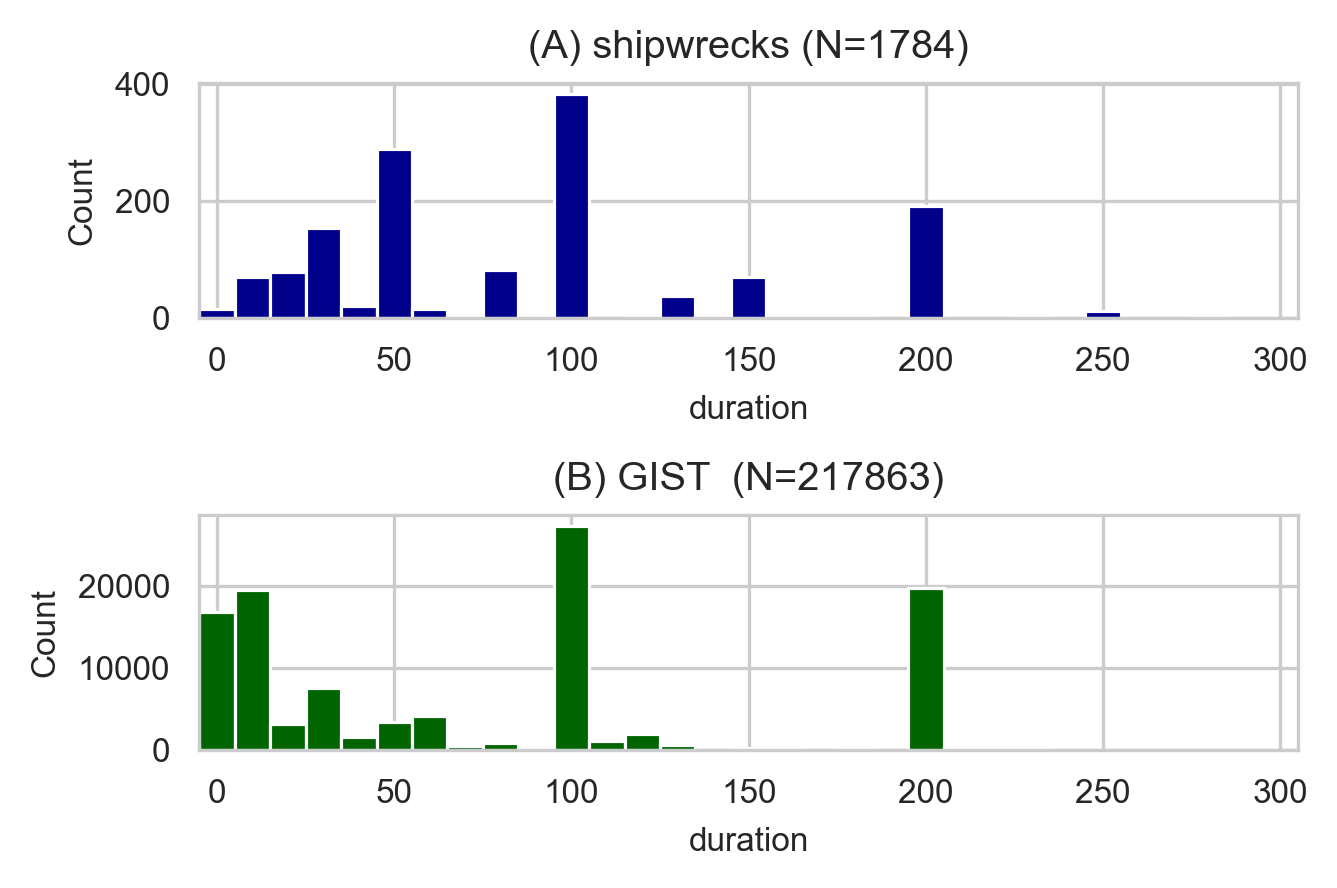

In [13]:
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(4.5,3), tight_layout=True, dpi=300)
sns.histplot(shipwrecks["duration"], kde=False, bins=range(-5, 305,10), alpha=1, color="darkblue", ax=ax1)
ax1.set_xlim(-5, 305)
ax1.set_title("(A) shipwrecks (N={0})".format(str(len(shipwrecks))))

sns.histplot(GIST["duration"], kde=False, bins=range(-5, 305,10), alpha=1, color="darkgreen", ax=ax2)
ax2.set_xlim(-5, 305)
ax2.set_title("(B) GIST  (N={0})".format(str(len(GIST))))


In [14]:
fig.savefig("../figures/durations.png")
fig.savefig("../figures/durations.tiff")

# Midpoint approach

In [15]:
def get_range(start, end):
    try:
        return int(np.mean([start, end]))
    except:
        return None
shipwrecks["midpoint"] = shipwrecks.apply(lambda row: get_range(row["post_0"], row["ante_0"]), axis=1)
GIST["midpoint"] = GIST.apply(lambda row: get_range(row["not_before"], row["not_after"]), axis=1)

In [16]:
np.mean([-31, 410])

189.5

(-625.0, 425.0)

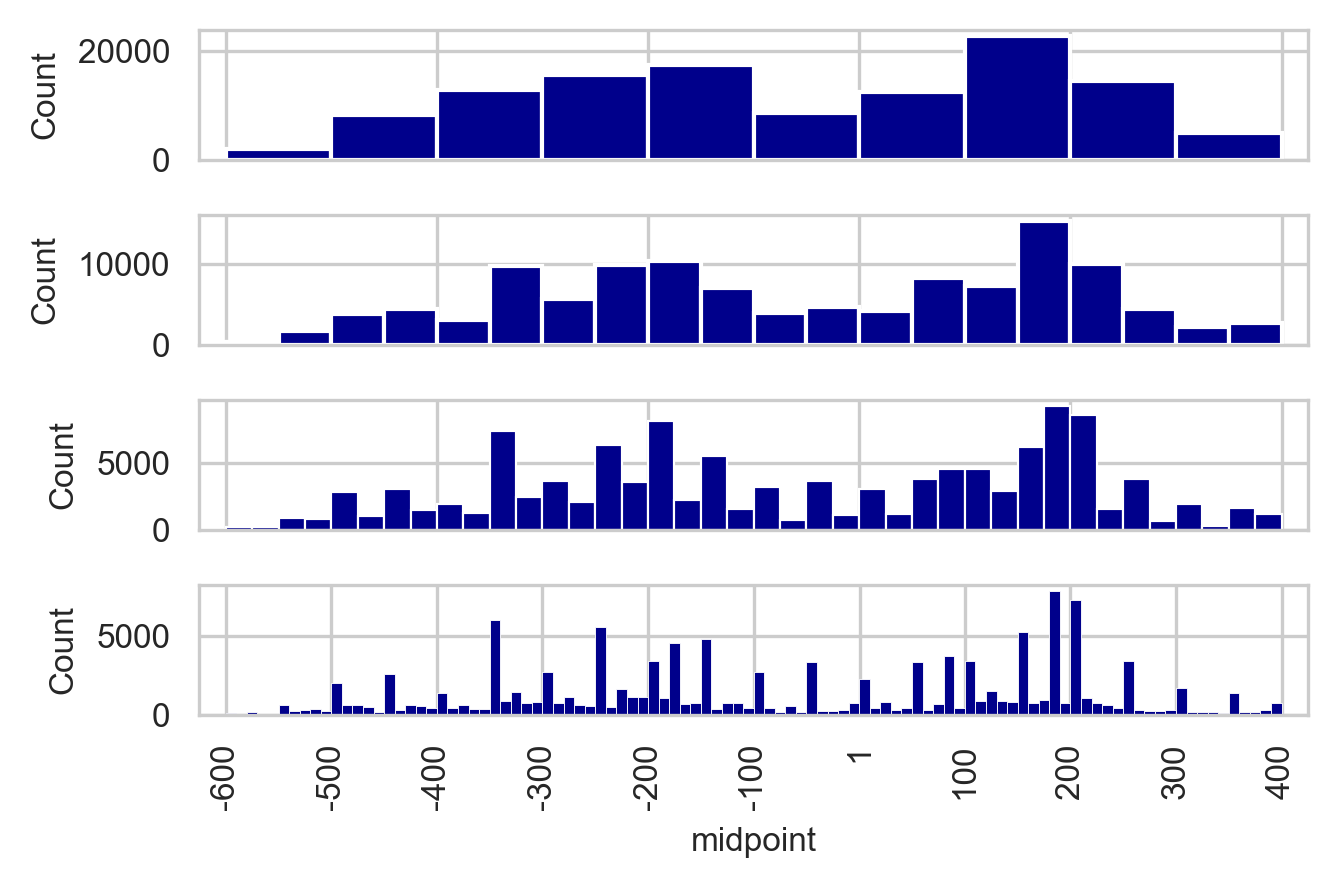

In [17]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1, figsize=(4.5, 3), tight_layout=True, dpi=300)

sns.histplot(GIST["midpoint"], kde=False, bins=range(-700, 500, 100 ) , alpha=1, color="darkblue", ax=ax1)
ax1.set_xticklabels([])
ax1.set_xlabel("")
ax1.set_xlim(-625,425)

sns.histplot(GIST["midpoint"], kde=False, bins=range(-700, 450, 50 ), alpha=1, color="darkblue", ax=ax2)
ax2.set_xticklabels([])
ax2.set_xlabel("")
ax2.set_xlim(-625,425)


sns.histplot(GIST["midpoint"], kde=False, bins=range(-700, 425, 25 ), alpha=1, color="darkblue", ax=ax3)
ax3.set_xticklabels([])
ax3.set_xlabel("")
ax3.set_xlim(-625,425)


sns.histplot(GIST["midpoint"], kde=False, bins=range(-700, 410, 10 ), alpha=1, color="darkblue", ax=ax4)
ax4.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax4.set_xticklabels([el + 1 if el==0 else el for el in range(-600,500,100)], rotation=90)
ax4.set_xlim(-625,425)



In [18]:
len(GIST[(GIST["midpoint"].notnull())])

127179

In [19]:
len(GIST[(GIST["midpoint"].notnull()) & (GIST["duration"]<100)])

58076

In [20]:
len(GIST[(GIST["midpoint"].notnull()) & (GIST["duration"]<50)])

49443

Text(0.5, 1.0, '(D) GIST, duration < 50 (N=49443, binwidth=25)')

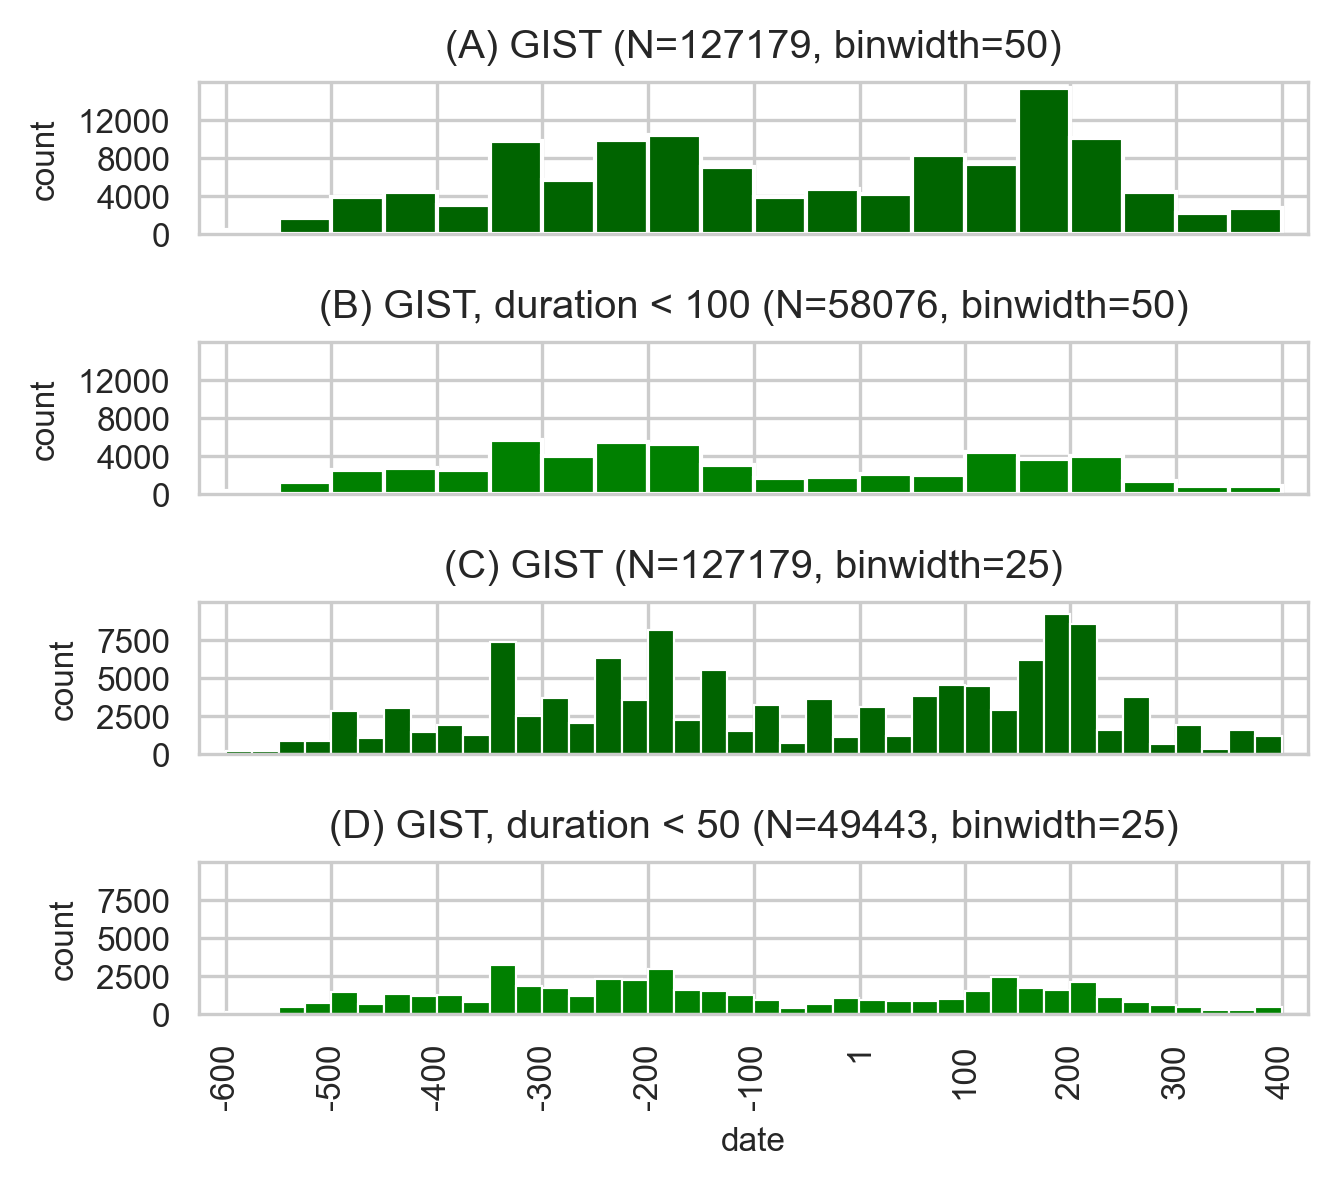

In [21]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1, figsize=(4.5, 4), tight_layout=True, dpi=300)

sns.histplot(GIST["midpoint"], kde=False, bins=range(-700, 450, 50), alpha=1, color="darkgreen", ax=ax1)
ax1.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax1.set_xticklabels([])
ax1.set_xlabel("")
ax1.set_ylabel("count")
ax1.set_xlim(-625,425)
ax1.set_yticks([0, 4000, 8000,12000])
ax1.set_ylim(0,16000)
N = len(GIST[(GIST["midpoint"].notnull())])
ax1.set_title("(A) GIST (N={}, binwidth=50)".format(str(N)))

sns.histplot(GIST[GIST["duration"]<100]["midpoint"], kde=False, bins=range(-700, 425, 50 ), alpha=1, color="green", ax=ax2)
ax2.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax2.set_xticklabels([])
ax2.set_xlabel("")
ax2.set_ylabel("count")
ax2.set_xlim(-625,425)
ax2.set_yticks([0, 4000, 8000,12000])
ax2.set_ylim(0,16000)
N = len(GIST[(GIST["midpoint"].notnull()) & (GIST["duration"]<100)])
ax2.set_title("(B) GIST, duration < 100 (N={}, binwidth=50)".format(str(N)))


sns.histplot(GIST["midpoint"], kde=False, bins=range(-700, 425, 25 ), alpha=1, color="darkgreen", ax=ax3)
ax3.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax3.set_xticklabels([])
ax3.set_xlabel("")
ax3.set_ylabel("count")
ax3.set_xlim(-625,425)
ax3.set_ylim(0,10000)
ax3.set_yticks([0, 2500, 5000, 7500])
N = len(GIST[(GIST["midpoint"].notnull())])
ax3.set_title("(C) GIST (N={}, binwidth=25)".format(str(N)))


sns.histplot(GIST[GIST["duration"]<50]["midpoint"], kde=False, bins=range(-700, 425, 25 ), alpha=1, color="green", ax=ax4)
ax4.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax4.set_xticklabels([el + 1 if el==0 else el for el in range(-600,500,100)], rotation=90)
ax4.set_xlim(-625,425)
ax4.set_xlabel("date")
ax4.set_ylabel("count")
ax4.set_yticks([0, 2500, 5000, 7500])
ax4.set_ylim(0,10000)
N = len(GIST[(GIST["midpoint"].notnull()) & (GIST["duration"]<50)])
ax4.set_title("(D) GIST, duration < 50 (N={}, binwidth=25)".format(str(N)))

In [22]:
fig.savefig("../figures/midpoints.png")
fig.savefig("../figures/midpoints.tiff")

# Aoristic sum

In [23]:
timeblocks_50 = tempun.get_timeblocks(-600,400,50)
timeblocks_50

[(-600, -551),
 (-550, -501),
 (-500, -451),
 (-450, -401),
 (-400, -351),
 (-350, -301),
 (-300, -251),
 (-250, -201),
 (-200, -151),
 (-150, -101),
 (-100, -51),
 (-50, -1),
 (1, 50),
 (51, 100),
 (101, 150),
 (151, 200),
 (201, 250),
 (251, 300),
 (301, 350),
 (351, 400)]

In [24]:
GIST["dateprobs_50"] = GIST.apply(lambda row: tempun.get_aoristic(row["not_before"], row["not_after"], timeblocks_50), axis=1)

In [25]:
timeblocks_50 = tempun.get_timeblocks(-600,400,50)
aoristic_sums_50 = tempun.get_aoristic_sum(GIST["dateprobs_50"], timeblocks_50)

In [45]:
shipwrecks["dateprobs_50"] = shipwrecks.apply(lambda row: tempun.get_aoristic(row["post_0"], row["ante_0"], timeblocks_50), axis=1)
shipwrecks_aoristic_sums_50 = tempun.get_aoristic_sum(shipwrecks["dateprobs_50"], timeblocks_50)

In [41]:
shipwrecks_aoristic_sums_50

{(-600, -551): 925.83161,
 (-550, -501): 2014.74682,
 (-500, -451): 3845.62418,
 (-450, -401): 4019.47057,
 (-400, -351): 5656.11704,
 (-350, -301): 8260.25816,
 (-300, -251): 7682.2076,
 (-250, -201): 8777.103,
 (-200, -151): 8652.8677,
 (-150, -101): 6981.6581,
 (-100, -51): 4946.97949,
 (-50, -1): 5377.02642,
 (1, 50): 6169.20893,
 (51, 100): 6159.33579,
 (101, 150): 9896.23343,
 (151, 200): 9534.45621,
 (201, 250): 8302.42477,
 (251, 300): 5814.00593,
 (301, 350): 3092.72217,
 (351, 400): 2850.2957}

In [26]:
timeblocks_25 = tempun.get_timeblocks(-600,400,25)
GIST["dateprobs_25"] = GIST.apply(lambda row: tempun.get_aoristic(row["not_before"], row["not_after"], timeblocks_25), axis=1)
aoristic_sums_25 = tempun.get_aoristic_sum(GIST["dateprobs_25"], timeblocks_25)

Text(0.5, 1.0, '(B) GIST (bin 25 years)')

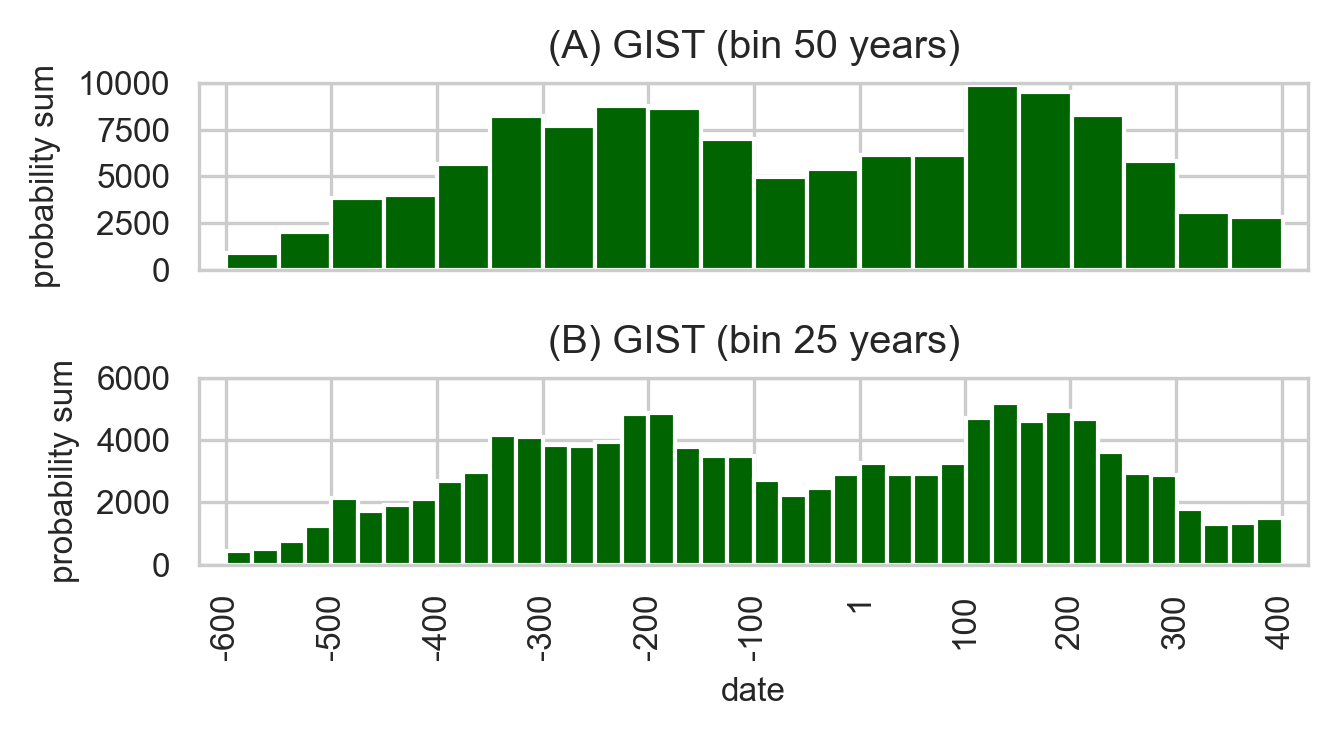

In [27]:
fig, [ax1, ax2] = plt.subplots(2,1, figsize=(4.5, 2.5), tight_layout=True, dpi=300)
ax1.bar(x=[tup[0] for tup in aoristic_sums_50.keys()], height=aoristic_sums_50.values(), width=50, align="edge", color="darkgreen")
ax1.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax1.set_xticklabels([])
ax1.set_xlim(-625,425)
ax1.set_yticks([0, 2500, 5000, 7500, 10000])
ax1.set_ylim(0, 10000)
ax1.set_ylabel("probability sum")
ax1.set_title("(A) GIST (bin 50 years)")


ax2.bar(x=[tup[0] for tup in aoristic_sums_25.keys()], height=aoristic_sums_25.values(), width=25, align="edge", color="darkgreen")
ax2.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax2.set_xticklabels([el + 1 if el==0 else el for el in range(-600,500,100)], rotation=90)
ax2.set_xlim(-625,425)
ax2.set_xlabel("date")
ax2.set_yticks([0, 2000, 4000, 6000])
ax2.set_ylim(0,6000)
ax2.set_ylabel("probability sum")
ax2.set_title("(B) GIST (bin 25 years)")


In [28]:
fig.savefig("../figures/aoristicsum_gist.png")
fig.savefig("../figures/aoristicsum_gist.tiff")

# Monte Carlo Approach

In [29]:
shipwrecks["random_dates"] = shipwrecks.apply(lambda row: tempun.model_date(row["post_0"], row["ante_0"], size=100, seed=row["index_id"]), axis=1)

In [30]:
GIST["random_dates"] = GIST.apply(lambda row: tempun.model_date(start=row["not_before"], stop=row["not_after"], size=100, seed=row["PHI_ID"]), axis=1)

In [31]:
GIST.columns

Index(['PHI_ID', 'reference', 'metadata', 'lines', 'text_raw', 'text_iphi',
       'clean_text_conservative', 'clean_text_interpretive_word', 'lemmata',
       'raw_date', 'not_before', 'not_after', 'date_type', 'region_main_id',
       'region_sub_id', 'TM_ID', 'EDH_ID', 'EDCS_ID', 'EDR_ID', 'LUPA_ID',
       'ISic_ID', 'IG_ID', 'atticinscriptions_ID', 'Attalus_ID', 'TMgeo_ID',
       'x_long', 'y_lat', 'TMgeo_name', 'geometry', 'duration', 'midpoint',
       'dateprobs_50', 'dateprobs_25', 'random_dates'],
      dtype='object')

In [33]:
GIST_sample = GIST[(GIST["not_before"].notnull()) & (GIST["not_after"].notnull())].sample(5, random_state=0)
#GIST_sample["random_dates_10"] = GIST_sample["random_dates"].apply(lambda x: x[:10])
GIST_sample_simple = GIST_sample[["PHI_ID", "raw_date", "not_before", "not_after", "random_dates"]]

In [34]:
GIST_sample_simple

,PHI_ID,raw_date,not_before,not_after,random_dates
85285,218434,Rom. Imp. period,-31.0,410.0,"[306, 386, 82, 123, 7, 189, 99, 119, 80, 206, ..."
12598,12996,s. II p.,101.0,200.0,"[171, 136, 125, 169, 198, 197, 131, 128, 109, ..."
165170,299245,2nd/3rd c. AD,101.0,300.0,"[144, 119, 159, 116, 151, 225, 146, 151, 190, ..."
160011,294030,Hellenistic period,-330.0,-30.0,"[-158, -325, -64, -204, -280, -268, -52, -35, ..."
78012,207841,ca. 250-225 BC,-252.0,-223.0,"[-237, -232, -243, -231, -247, -231, -230, -22..."


In [35]:
print(GIST_sample_simple.to_latex(index=False, caption='GIST sample: 5 records with random dates', label='tab:gist_random_dates'))

\begin{table}
\centering
\caption{GIST sample: 5 records with random dates}
\label{tab:gist_random_dates}
\begin{tabular}{rlrrl}
\toprule
 PHI\_ID &           raw\_date &  not\_before &  not\_after &                                       random\_dates \\
\midrule
 218434 &  Rom. Imp. period  &       -31.0 &      410.0 & [306, 386, 82, 123, 7, 189, 99, 119, 80, 206, 1... \\
  12996 &          s. II p.  &       101.0 &      200.0 & [171, 136, 125, 169, 198, 197, 131, 128, 109, 1... \\
 299245 &     2nd/3rd c. AD  &       101.0 &      300.0 & [144, 119, 159, 116, 151, 225, 146, 151, 190, 1... \\
 294030 & Hellenistic period &      -330.0 &      -30.0 & [-158, -325, -64, -204, -280, -268, -52, -35, -... \\
 207841 &    ca. 250-225 BC  &      -252.0 &     -223.0 & [-237, -232, -243, -231, -247, -231, -230, -225... \\
\bottomrule
\end{tabular}
\end{table}


/var/folders/zg/zvg9y3rs7j527jxfq9sc2xqc0000gn/T/ipykernel_1329/3315153325.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  print(GIST_sample_simple.to_latex(index=False, caption='GIST sample: 5 records with random dates', label='tab:gist_random_dates'))


Text(0, 0.5, 'count')

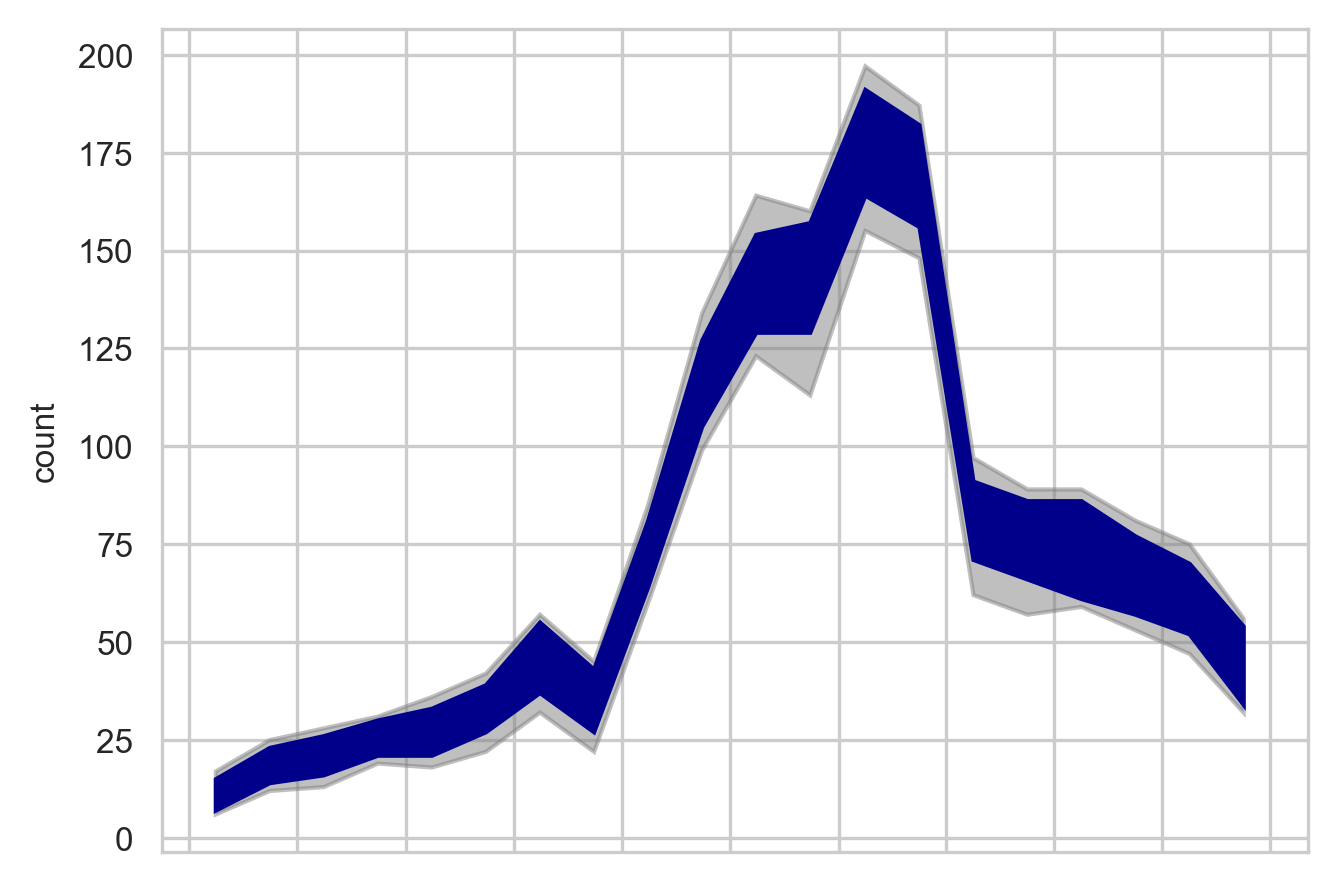

In [38]:
fig, ax = plt.subplots(tight_layout=True,figsize=(4.5, 3), dpi=300)
tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], color="darkblue", timeblocks=timeblocks_50, ax=ax)
ax.set_xlim(-625,435)
ax.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax.set_xticklabels([], rotation=90)
ax.set_ylabel("count")

In [39]:
fig.savefig("../figures/timeblocksplot_shipwrecks.png")
fig.savefig("../figures/timeblocksplot_shipwrecks.tiff")

In [ ]:
fig, ax = plt.subplots(tight_layout=True,figsize=(4.5, 3), dpi=300)
tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], color="darkblue", timeblocks=timeblocks_50, ax=ax)
ax.set_xlim(-625,435)
ax.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax.set_xticklabels([], rotation=90)
ax.set_ylabel("count")

Text(0.5, 1.0, '(C) shipwrecks - MCS KDE plot')

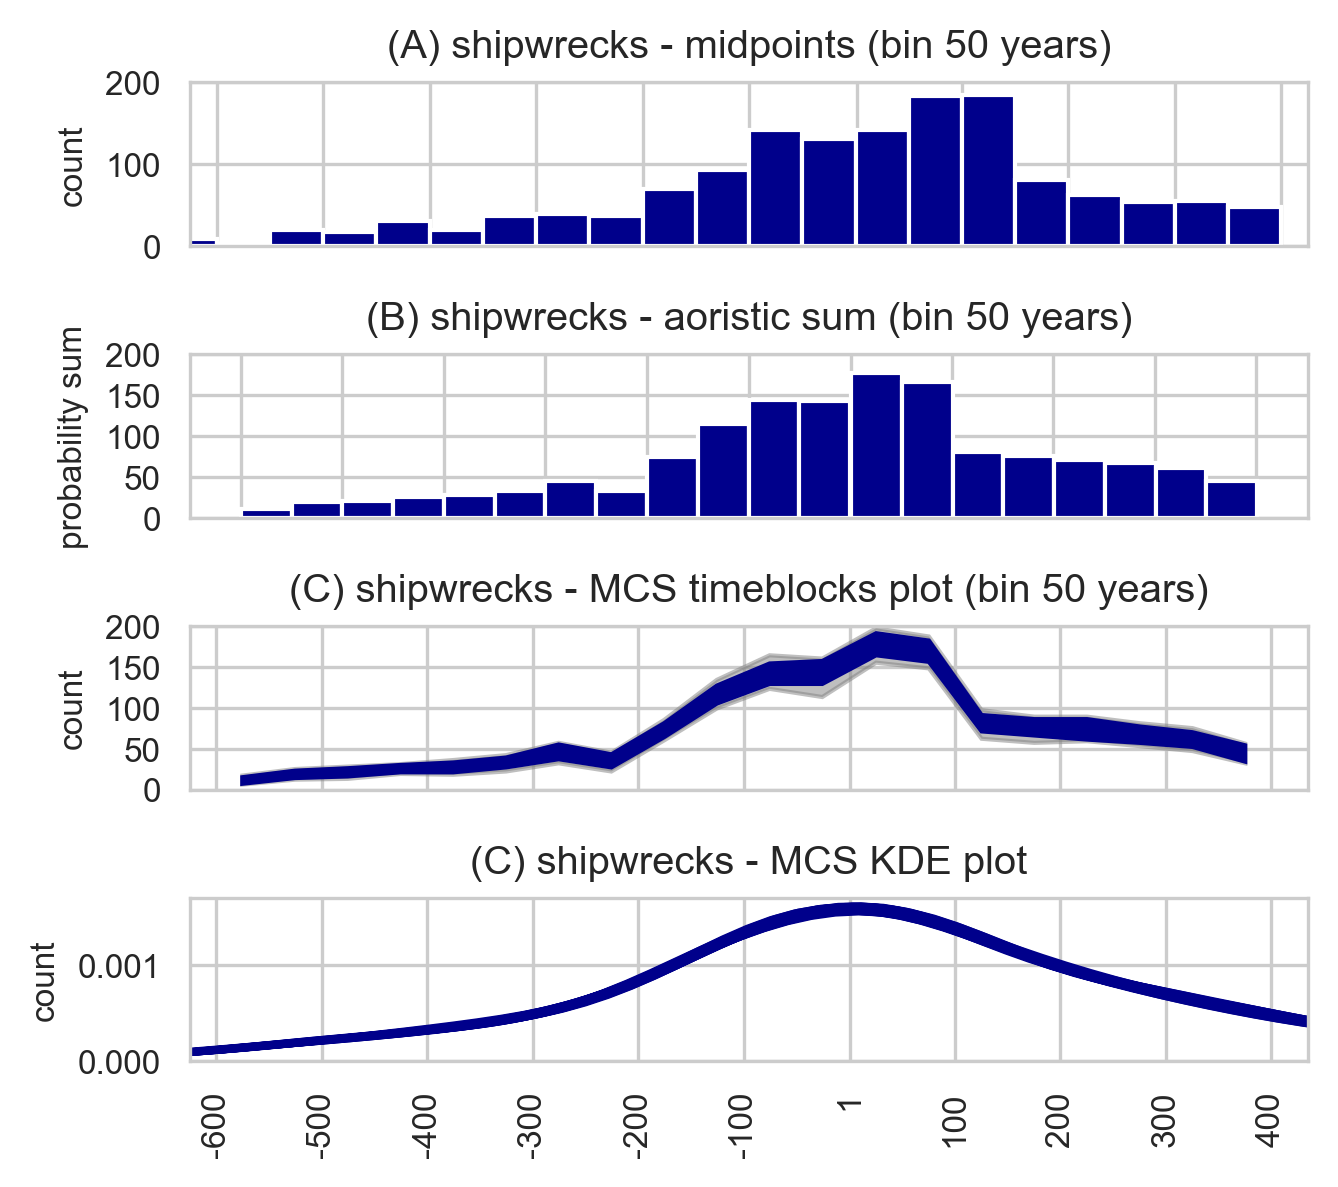

In [57]:
fig, [ax1, ax2, ax3, ax4] = plt.subplots(4,1, tight_layout=True,figsize=(4.5, 4), dpi=300)

# shipwrecks - midpoints
sns.histplot(shipwrecks[shipwrecks["duration"]<=10000]["midpoint"], kde=False, bins=range(-700, 425, 50 ), alpha=1, color="darkblue", ax=ax1)
ax1.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax1.set_xticklabels([])
ax1.set_xlabel("")
ax1.set_ylabel("count")
ax1.set_xlim(-625,425)
ax2.set_yticks([0, 50, 100, 150, 200])
ax1.set_ylim(0,200)
N = len(shipwrecks[(shipwrecks["midpoint"].notnull()) & (shipwrecks["duration"]<=100000)])
ax1.set_title("(A) shipwrecks - midpoints (bin 50 years)")

# shipwrecks - aoristic sum
ax2.bar(x=[tup[0] for tup in shipwrecks_aoristic_sums_50.keys()], height=shipwrecks_aoristic_sums_50.values(), width=50, align="edge", color="darkblue")
ax2.set_xticks([el + 1 if el==0 else el for el in range(-600,500,100)])
ax2.set_xticklabels([])
ax2.set_yticks([0, 50, 100, 150, 200])
ax2.set_ylim(0, 200)
ax2.set_ylabel("probability sum")
ax2.set_title("(B) shipwrecks - aoristic sum (bin 50 years)")

tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], color="darkblue", timeblocks=timeblocks_50, ax=ax3)
ax3.set_xlim(-625,435)
ax3.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax3.set_xticklabels([], rotation=90)
ax3.set_yticks([0, 50, 100, 150, 200])
ax3.set_ylabel("count")
ax3.set_ylim(0,200)
ax3.set_title("(C) shipwrecks - MCS timeblocks plot (bin 50 years)")

tempun.kdeplot_from_randoms(shipwrecks["random_dates"], color="darkblue", ax=ax4)
ax4.set_xlim(-625,435)
ax4.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax4.set_xticklabels([el + 1 if el==0 else el for el in range(-600,500,100)], rotation=90)
#ax4.set_yticks([0, 50, 100, 150, 200])
ax4.set_ylabel("count")
#ax4.set_ylim(0,200)
ax4.set_title("(C) shipwrecks - MCS KDE plot")

In [58]:
fig.savefig("../figures/shipwrecks_midpoints+aoristic+timeblocks+kde.png")
fig.savefig("../figures/shipwrecks_midpoints+aoristic+timeblocks+kde.tiff")

Text(0, 0.5, 'count')

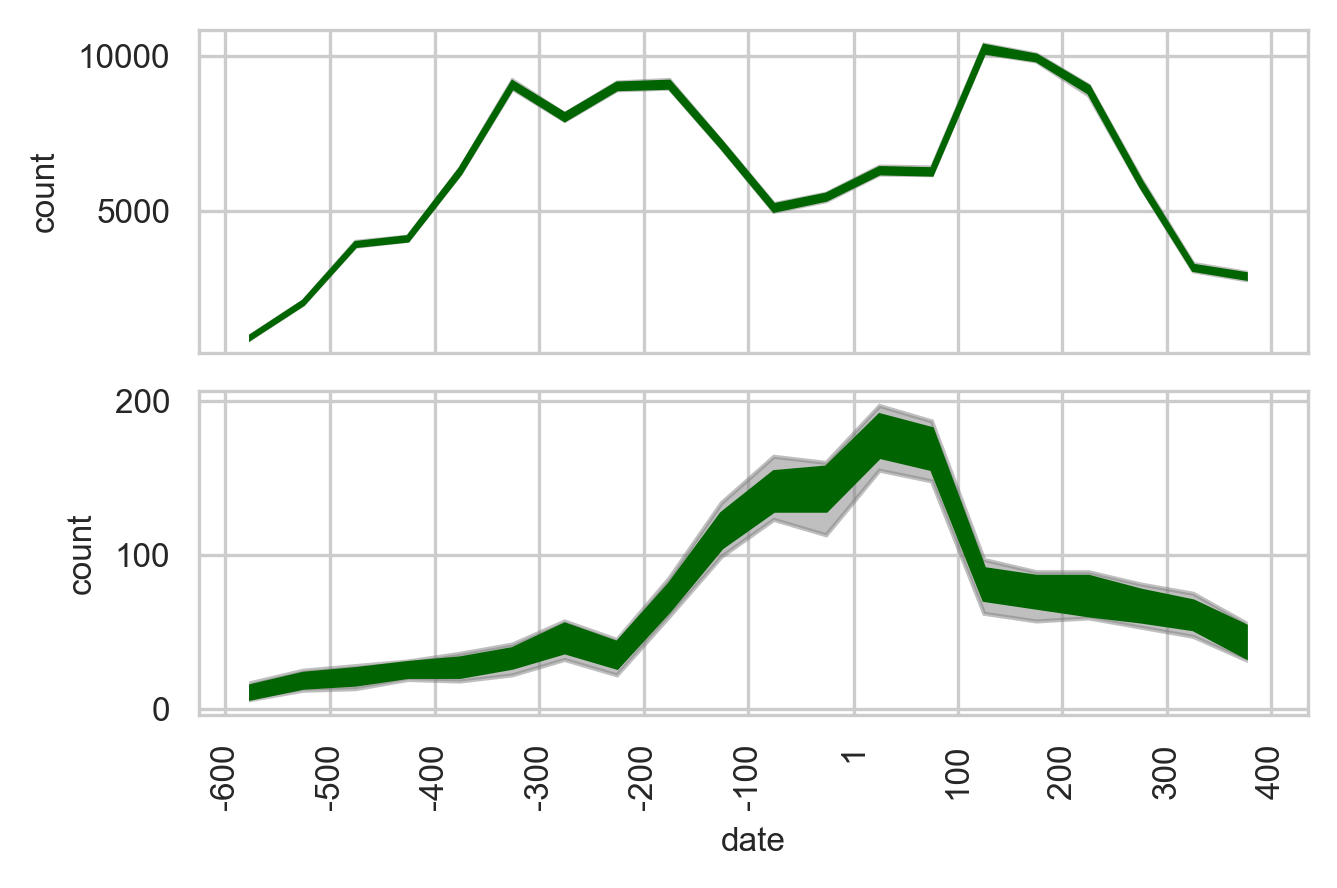

In [81]:
fig, [ax1, ax2] = plt.subplots(2,1, tight_layout=True,figsize=(4.5, 3), dpi=300)
tempun.timeblocksplot_from_randoms(GIST["random_dates"], color="darkgreen", timeblocks=timeblocks_50, ax=ax1)
ax1.set_xlim(-625,435)
ax1.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax1.set_xticklabels([], rotation=90)
ax1.set_ylabel("count")

tempun.timeblocksplot_from_randoms(shipwrecks["random_dates"], color="darkgreen", timeblocks=timeblocks_50, ax=ax2)
ax2.set_xlim(-625,435)
ax2.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax2.set_xticklabels([el + 1 if el == 0 else el for el in range(-600, 500, 100)], rotation=90)
ax2.set_xlabel("date")
ax2.set_ylabel("count")

In [ ]:
fig.savefig("../figures/timeblocksplot_gist+shipwrecks.png")
fig.savefig("../figures/timeblocksplot_gist+shipwrecks.tiff")

# Simple stastical test comparing two timeblocks

In [59]:
simulations_variants = tempun.get_simulation_variants(GIST["random_dates"])

In [63]:
timeseries = simulations_variants[0]

In [64]:
start = 101
stop = 150
sum([True for el in timeseries if start <= el <= stop])

10184

In [70]:
def N_in_bin(sim, start, stop):
    return sum([True for el in sim if start <= el <= stop])

In [78]:
bin_numbers = []
for n in range(0, 100):
    bin1 = N_in_bin(simulations_variants[n], 1, 50)
    bin2 = N_in_bin(simulations_variants[n], 51, 100)
    bin_numbers.append((bin1, bin2))

In [79]:
bin_numbers

[(6317, 6271),
 (6395, 6222),
 (6249, 6317),
 (6248, 6217),
 (6289, 6285),
 (6300, 6272),
 (6290, 6265),
 (6342, 6230),
 (6337, 6222),
 (6321, 6217),
 (6293, 6198),
 (6317, 6276),
 (6297, 6183),
 (6368, 6279),
 (6311, 6298),
 (6282, 6309),
 (6306, 6269),
 (6345, 6164),
 (6340, 6239),
 (6298, 6215),
 (6303, 6229),
 (6293, 6271),
 (6309, 6269),
 (6238, 6198),
 (6210, 6281),
 (6319, 6276),
 (6265, 6304),
 (6423, 6188),
 (6395, 6265),
 (6207, 6251),
 (6201, 6275),
 (6343, 6263),
 (6270, 6241),
 (6293, 6264),
 (6296, 6222),
 (6213, 6290),
 (6322, 6169),
 (6328, 6273),
 (6281, 6250),
 (6347, 6163),
 (6367, 6237),
 (6318, 6259),
 (6255, 6285),
 (6209, 6314),
 (6282, 6255),
 (6197, 6284),
 (6330, 6221),
 (6283, 6285),
 (6334, 6253),
 (6170, 6269),
 (6233, 6309),
 (6253, 6316),
 (6287, 6335),
 (6298, 6261),
 (6299, 6167),
 (6334, 6208),
 (6262, 6400),
 (6377, 6223),
 (6322, 6292),
 (6302, 6245),
 (6328, 6195),
 (6345, 6278),
 (6331, 6251),
 (6306, 6165),
 (6340, 6267),
 (6359, 6235),
 (6369, 62

In [80]:
sum([tup[0] > tup[1] for tup in bin_numbers])

68

# δικαιοσύνη in GIST

In [91]:
GIST["dikai_N"] = GIST["lemmata"].apply(lambda x: list(x["data"]).count("δικαιοσύνη"))

In [92]:
def get_dikai_per_1000inscr(timeblock_df):
    timeblock_df.sample(1000, replace=True)
    dikai_N_sum = timeblock_df["dikai_N"].sum()
    return dikai_N_sum
dikai_N_per_1000inscr = tempun.sim_data_by_function(GIST, 100, [-600, 400, 50], get_dikai_per_1000inscr)

In [95]:
dikai_N_per_1000inscr[0]

[((-600, -551), 0),
 ((-550, -501), 0),
 ((-500, -451), 1),
 ((-450, -401), 4),
 ((-400, -351), 36),
 ((-350, -301), 166),
 ((-300, -251), 65),
 ((-250, -201), 62),
 ((-200, -151), 44),
 ((-150, -101), 55),
 ((-100, -51), 27),
 ((-50, -1), 17),
 ((1, 50), 12),
 ((51, 100), 9),
 ((101, 150), 15),
 ((151, 200), 10),
 ((201, 250), 8),
 ((251, 300), 7),
 ((301, 350), 2),
 ((351, 400), 1)]

Text(0.5, 1.0, '(B) δικαιοσύνη per 1,000 inscriptions from GIST')

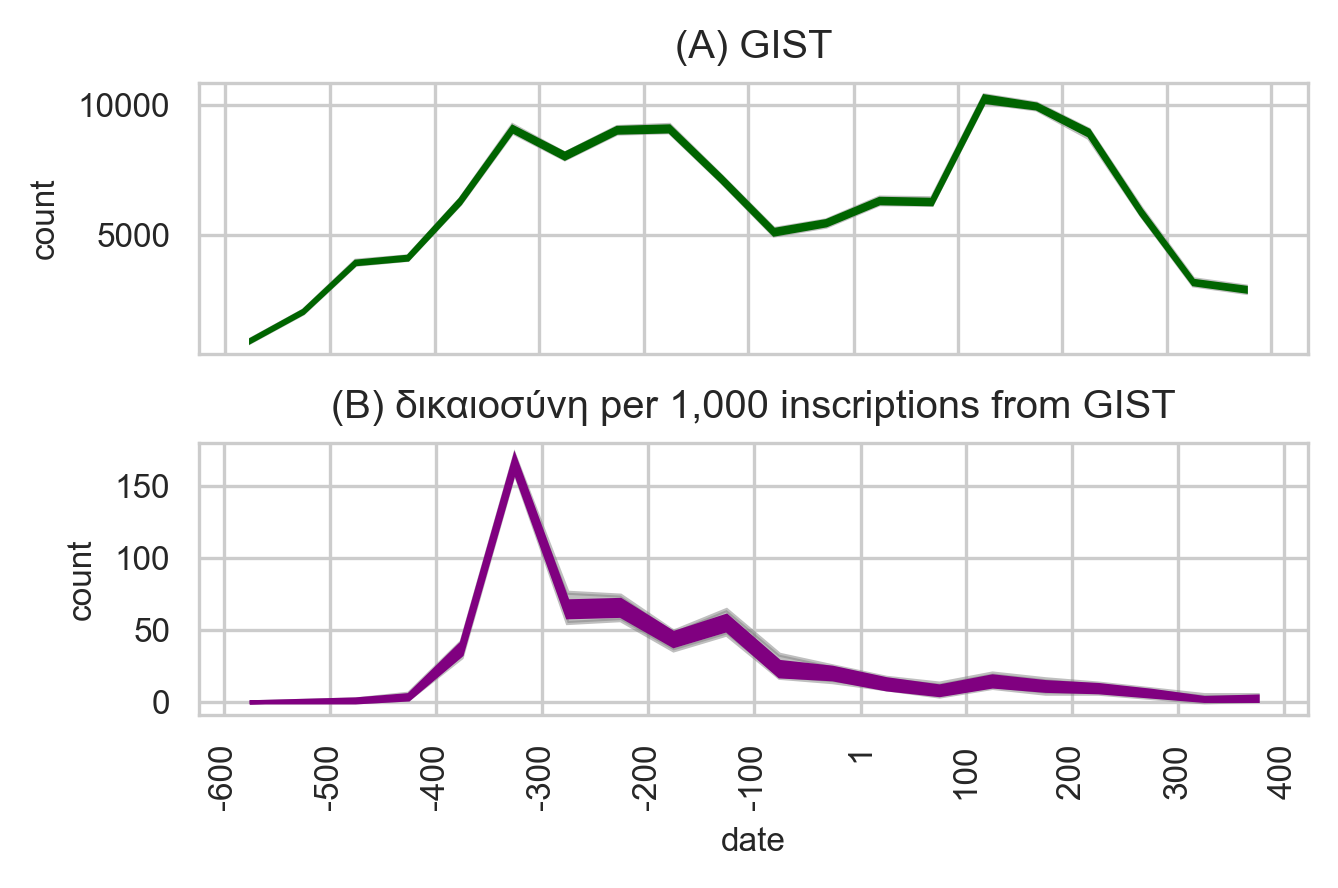

In [103]:
fig, [ax1, ax2] = plt.subplots(2,1, tight_layout=True,figsize=(4.5, 3), dpi=300)
tempun.timeblocksplot_from_randoms(GIST["random_dates"], color="darkgreen", timeblocks=timeblocks_50, ax=ax1)
ax1.set_xlim(-625,435)
ax1.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax1.set_xticklabels([], rotation=90)
ax1.set_title("(A) GIST")
ax1.set_ylabel("count")

tempun.plot_timeblocks_data(dikai_N_per_1000inscr, color="purple", ax=ax2)
ax2.set_xticks([el + 1 if el == 0 else el for el in range(-600, 500, 100)])
ax2.set_xticklabels([el + 1 if el == 0 else el for el in range(-600, 500, 100)], rotation=90)
ax2.set_xlabel("date")
ax2.set_ylabel("count")
ax2.set_title("(B) δικαιοσύνη per 1,000 inscriptions from GIST")

In [104]:
fig.savefig("../figures/gist+dikai.png")
fig.savefig("../figures/gist+dikai.tiff")